# Adaptive Cluster Tests

Noteboook for quickly looking at spectra for different values of tau. Mainly to test ginelli code is running on the cluster.

Also have compared with Lyapunovs code for julia

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import ginelli_plot as ginplt
from tqdm.notebook import tqdm
import os

In [17]:
# Opening Data

directory = 'tau-julia-comparison'
files = os.listdir(directory)
files.sort()
tau_test=[]
for experiment in tqdm(files):
    ds = xr.open_mfdataset(directory + f'/{experiment}/'
                           + 'step5/*.nc', parallel=True, combine='by_coords', concat_dim='time')
    tau_test.append(ds)
    
julia_data = xr.open_dataset('lyap44.jld2')['lambda'].values
sorted_julia = np.flip(np.sort(julia_data))

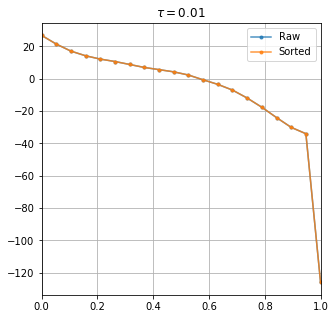

In [12]:
# Plotting Spectra

for data in tau_test:
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    ax.set_xlim((0, 1))
    spectra = ginplt.spectra(data)
    sorted_spec = np.flip(np.sort(spectra.values))
    ax.grid()
    ax.plot(np.linspace(0, 1, len(spectra)), spectra, '.-', alpha=0.8, label='Raw')
    ax.plot(np.linspace(0, 1, len(spectra)), sorted_spec, '.-', alpha=0.8, label='Sorted')
    ax.legend()
    ax.set_title(f'$\\tau = ${data.tau:.2f}')
    fig.show()

# Tau comparison

Bear in mind a larger tau is actually a longer trajectory

20


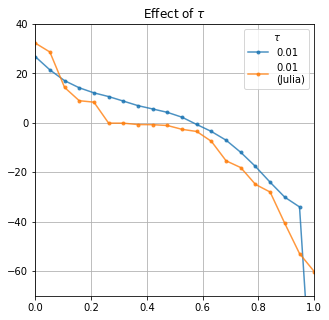

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.set_xlim((0, 1))
ax.set_ylim((-70, 40))
ax.grid()
ax.set_title(f'Effect of $\\tau$')

for data in tau_test:
    spectra = ginplt.spectra(data)
    print(len(spectra))
    sorted_spec = np.flip(np.sort(spectra.values))
    ax.plot(np.linspace(0, 1, len(spectra)), sorted_spec, '.-', alpha=0.8, label=f'{data.tau:.2f}')

ax.plot(np.linspace(0, 1, len(spectra)), sorted_julia, '.-', alpha=0.8, label='0.01\n(Julia)')
ax.legend(title='$\\tau$')
fig.show()

In [7]:
data

<xarray.Dataset>
Dimensions:   (le_index: 20, row: 20, time: 1000)
Coordinates:
  * le_index  (le_index) int64 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19 20
  * time      (time) float64 5.01 5.02 5.03 5.04 5.05 ... 14.97 14.98 14.99 15.0
Dimensions without coordinates: row
Data variables:
    ftble     (time, le_index) float64 dask.array<chunksize=(500, 20), meta=np.ndarray>
    ftcle     (time, le_index) float64 dask.array<chunksize=(500, 20), meta=np.ndarray>
    CLV       (time, row, le_index) float64 dask.array<chunksize=(500, 20, 20), meta=np.ndarray>
    BLV       (time, row, le_index) float64 dask.array<chunksize=(500, 20, 20), meta=np.ndarray>
Attributes:
    h:                    1
    Fs:                   10
    Ff:                   6
    c:                    10
    J:                    4
    K:                    4
    Number of variables:  20
    b:                    10
    tau:                  0.01
    transient:            50
    ka:                   500
    kb:                   1000
    kc:                   500